# Problem Statement
Online shopping has enabled consumers to make more online transactions due to its convenience and ease of use. However, there are scams which involves fraudulent transactions whereby the seller does not receive the payment from the buyer. 

With the help of this dataset, which includes both legitimate and fraudulent online transactions, we hope to create a machine learning classification model that can spot fraudulent activity.

### Dataset Dictionary
| Variable | Description |
| :--- | :---   |
| step | represents a unit of time where 1 step equals 1 hour |
|type	|type of online transaction |
|amount | the amount of the transaction|
|nameOrig | customer starting the transaction|
|oldbalanceOrg | balance before the transaction|
|newbalanceOrig | balance after the transaction|
|nameDest | recipient of the transaction|
|oldbalanceDest | initial balance of recipient before the transaction|
|newbalanceDest | the new balance of recipient after the transaction|
|isFraud |	fraud transaction|

# Data Handling Approaches
a. Data Cleaning and Formatting
- Check any null value or missing value
- Inspect any anomalies or outliers
- Impute or remove missing value

b. EDA (Exploratory Data Analysis)
- Analyse the data distribution pattern
- Encode the data
- Analyse the correlation using heatmap and Pairplot

c. Apply Machine Learning Algorithm
- Split the train and test dataset
- Apply different ML Alogorithm using Log Regression, KNN and Decision Tree

d. Evaluate the model performance
- Select the best model for inference

# Import Packages

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Data Cleaning and Formatting

## Data Acquisition and Initial Exploration

In [3]:
# This dataset was acquired from kaggle (Vehicle Insurance Claim Fraud Detection) at https://www.kaggle.com/datasets/shivamb/vehicle-claim-fraud-detection
df = pd.read_csv('fraud.csv')

In [4]:
# Dataset in a glance
df.head()
df.info()
df.describe()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


The 'isFraud' column will be the target variable with '1' representing cases of fraud and '0' representing non-fraud cases. The columns which may be useful in the training model are:

- type
- amount
- oldbalanceOrg
- newbalanceOrig
- oldbalanceDest
- newbalanceDest

## Checking for Missing Data or Duplicates

In [5]:
# Checking missing data
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [6]:
# Checking for duplicates
df.duplicated().sum()

0

No missing data or duplicates.

## Further Data Cleaning

In [7]:
# Creating a copy of master dataset
df_cleaned = df.copy()

In [8]:
# Cleaning dataset further by dropping 'nameOrig' and 'nameDest' from dataset
df_cleaned = df_cleaned.drop(['nameOrig','nameDest'], axis=1)
df_cleaned.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,0
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,0


# Exploratory Data Analysis (EDA)

## Exploring the Data Visually

array([[<AxesSubplot:title={'center':'step'}>,
        <AxesSubplot:title={'center':'amount'}>,
        <AxesSubplot:title={'center':'oldbalanceOrg'}>],
       [<AxesSubplot:title={'center':'newbalanceOrig'}>,
        <AxesSubplot:title={'center':'oldbalanceDest'}>,
        <AxesSubplot:title={'center':'newbalanceDest'}>],
       [<AxesSubplot:title={'center':'isFraud'}>,
        <AxesSubplot:title={'center':'isFlaggedFraud'}>, <AxesSubplot:>]],
      dtype=object)

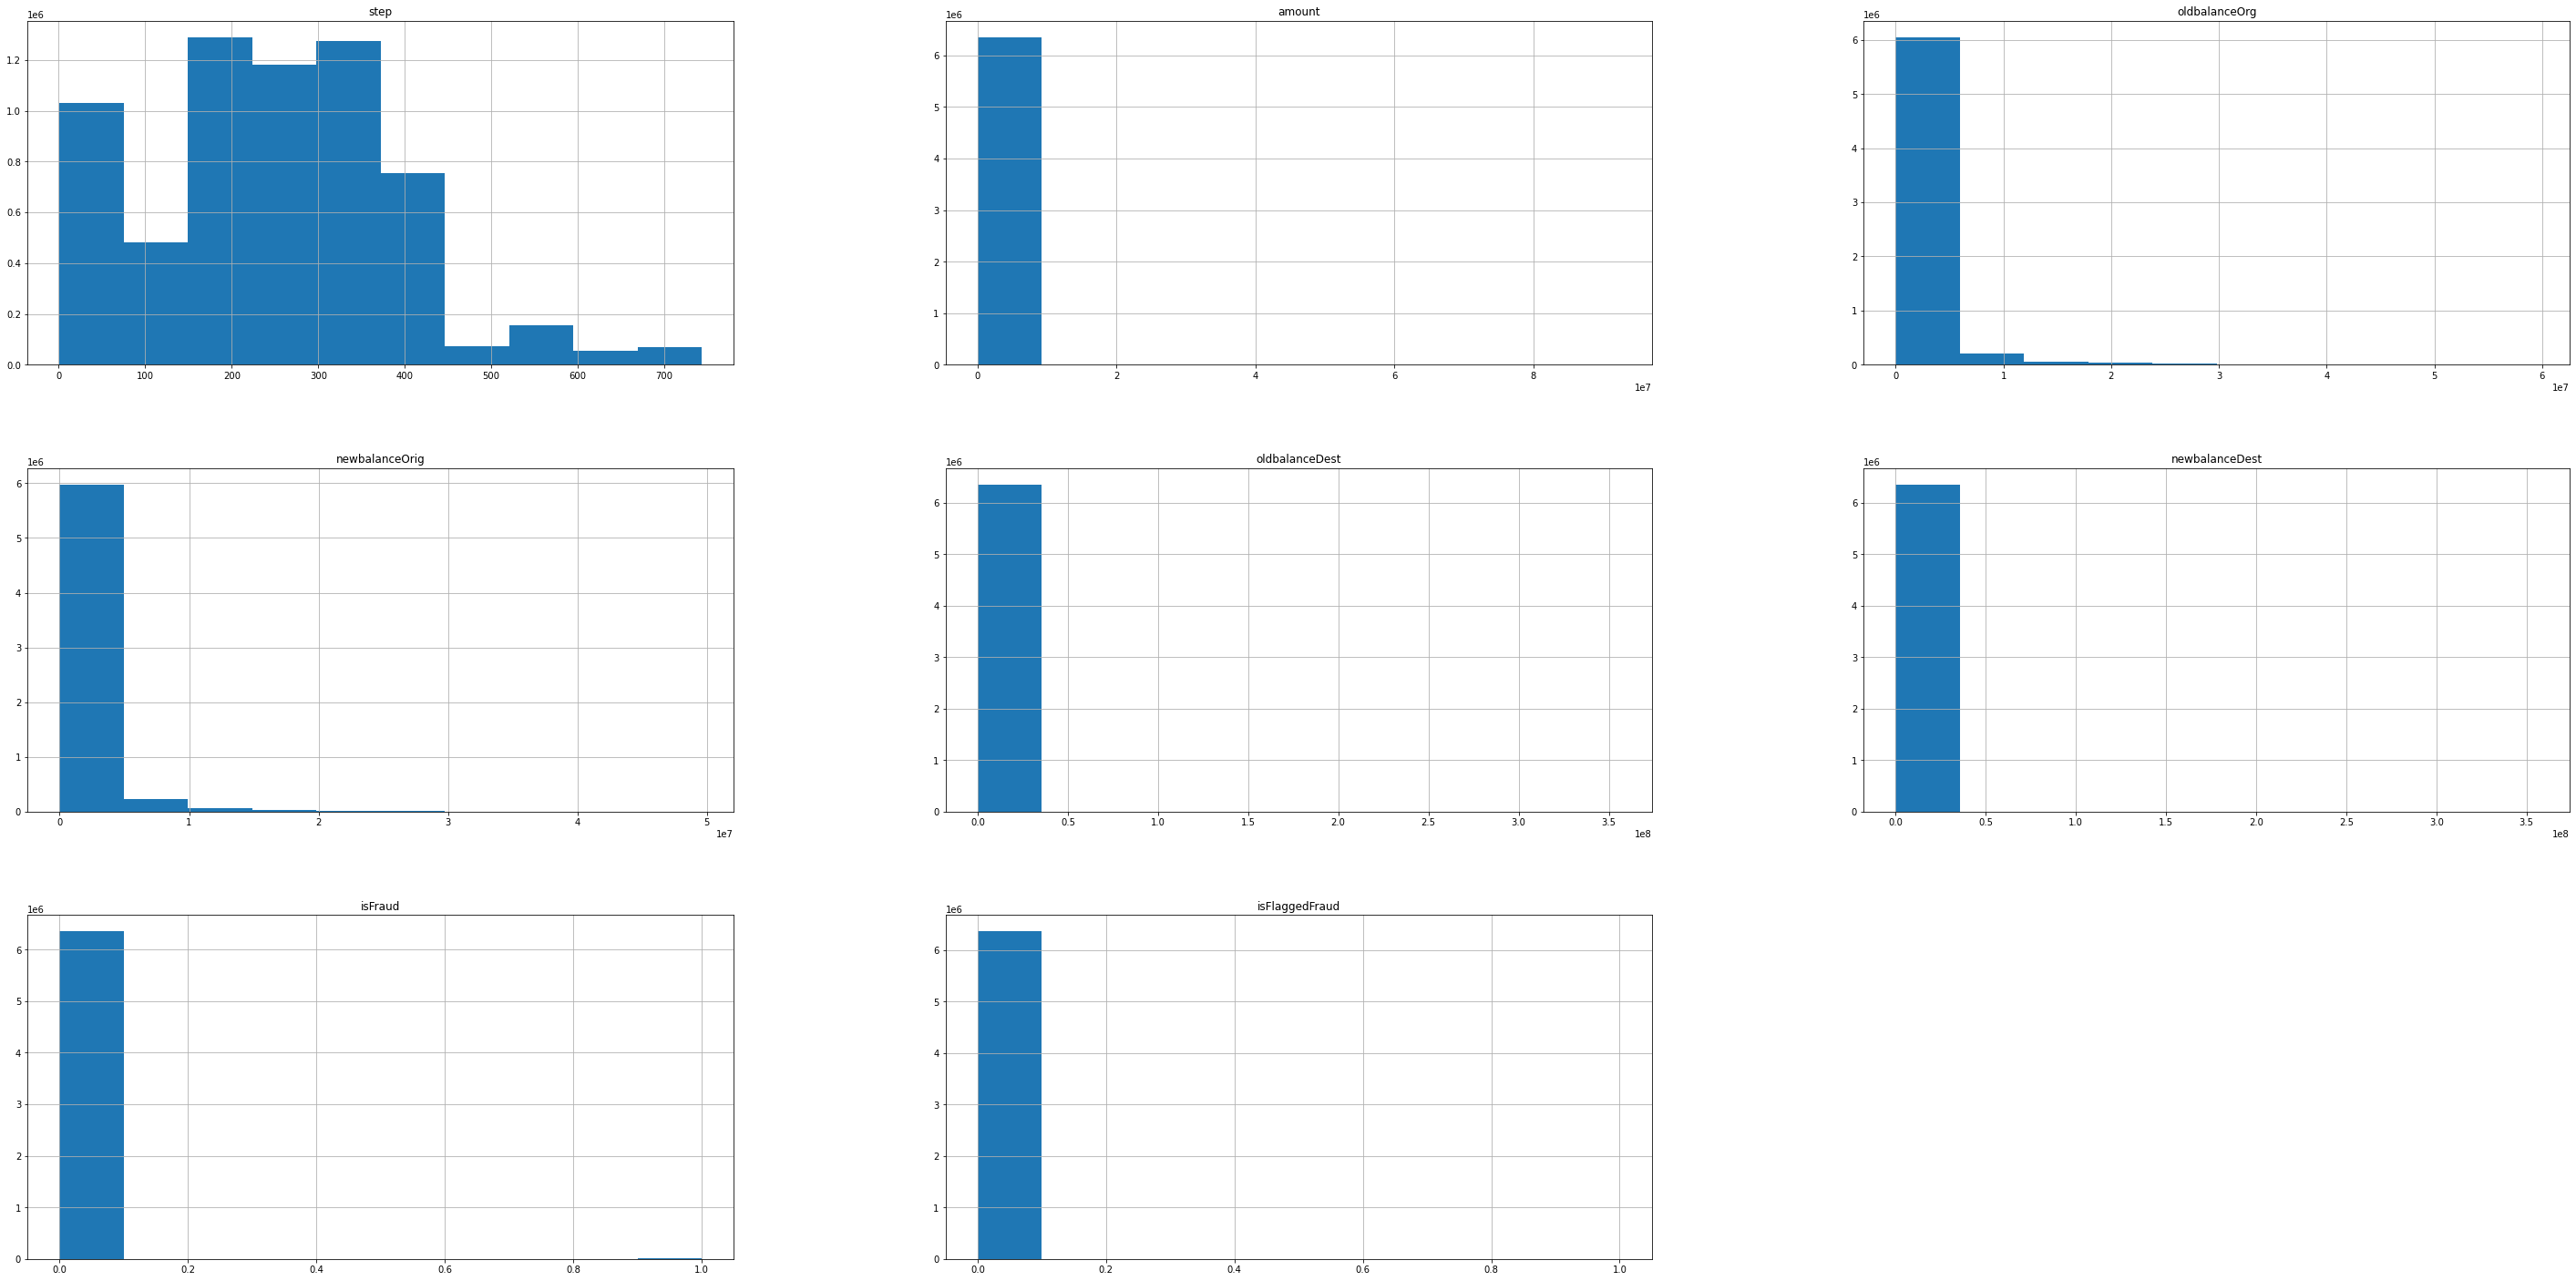

In [9]:
df_cleaned.hist(figsize=(50,25))

Figuring out which is the most common type of online transaction:

<AxesSubplot:xlabel='type', ylabel='count'>

Text(0.5, 1, 'Online Transactions')

Text(0, 0.5, 'Count')

Text(0.5, 0, 'Type of Transaction')

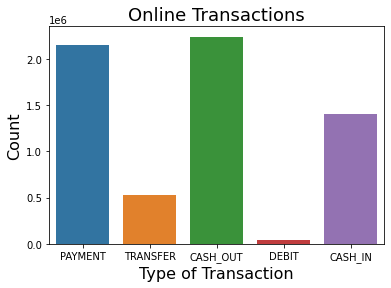

In [10]:
sns.countplot(x='type',data=df_cleaned)
plt.title('Online Transactions',y=1,fontsize=18)
plt.ylabel('Count',fontsize=16)
plt.xlabel('Type of Transaction',fontsize=16)

CASH_OUT is the most common type of transaction, followed by PAYMENT.

<AxesSubplot:xlabel='type', ylabel='amount'>

Text(0.5, 1, 'Money Transferred per Transaction')

Text(0, 0.5, 'Amount of Money')

Text(0.5, 0, 'Type of Transaction')

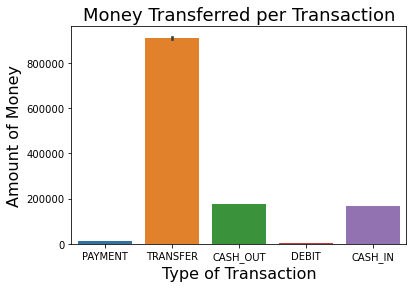

In [11]:
sns.barplot(x='type',y='amount',data=df_cleaned)
plt.title('Money Transferred per Transaction',y=1,fontsize=18)
plt.ylabel('Amount of Money',fontsize=16)
plt.xlabel('Type of Transaction',fontsize=16)

However, it seems that TRANSFER was the type of transaction that moves the most amount of money.

<AxesSubplot:xlabel='isFraud', ylabel='count'>

Text(0.5, 1, 'Fraudulent Transactions')

Text(0, 0.5, 'Count')

Text(0.5, 0, 'Fraud or Not')

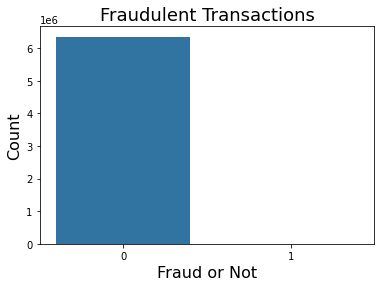

In [12]:
sns.countplot(x='isFraud',data=df_cleaned)
plt.title('Fraudulent Transactions',y=1,fontsize=18)
plt.ylabel('Count',fontsize=16)
plt.xlabel('Fraud or Not',fontsize=16)

<Figure size 1080x432 with 0 Axes>

Text(0.5, 1, 'Fraudulent Transactions')

Text(0.5, 0, 'amount')

Text(0, 0.5, 'isFraud')

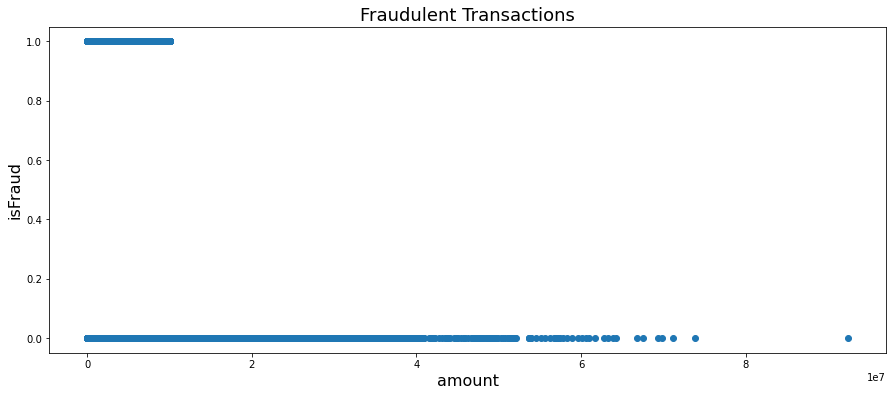

In [13]:
plt.figure(figsize=(15,6))
plt.scatter(x='amount',y='isFraud',data=df_cleaned)
plt.title('Fraudulent Transactions',y=1,fontsize=18)
plt.xlabel('amount',fontsize=16)
plt.ylabel('isFraud',fontsize=16)

As seen above, the dataset is very unbalanced with most transactions pointing to not being fraudulent.

In [14]:
# Checking how many transactions are fraudulent or nor
df_cleaned['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [15]:
8213/6354407*100

0.129248881917699

8213 transactions have been tagged as fraudulent in the dataset, which is approximately 0.13% of the total number of transactions.

<Figure size 1152x576 with 0 Axes>

<AxesSubplot:xlabel='isFraud', ylabel='count'>

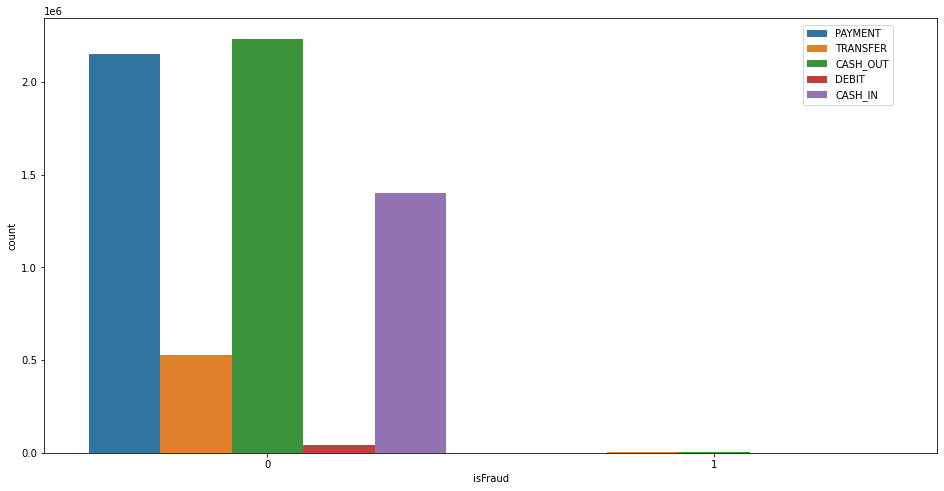

In [16]:
# Finding out which type of transactions comprise fraudulent transactions
plt.figure(figsize=(16,8))
sns.countplot(x='isFraud',data=df_cleaned,hue='type')
plt.legend(loc=[0.85,0.8])

It appears that fraudulent transactions are found in TRANSFER and CASH_OUT transaction types.

## Exploring Data Correlation and Heatmap

In [17]:
# Creating a separate copy of the dataframe just for heatmap and pairplot
df_vis = df_cleaned.copy()
df_vis.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,0
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,0


In [18]:
# Handling categorical variables
type_new = pd.get_dummies(df_vis['type'],drop_first=True)
df_vis = pd.concat([df_vis,type_new],axis=1)
df_vis.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,0,1,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,0,1,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,0,0,0,0,1
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,0,1,0,0,0
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,0,1,0


In [19]:
# Transforming features of object dtypes to numeric features
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in df_vis:
    if df_vis[col].dtypes=='object':
        df_vis[col]=le.fit_transform(df_vis[col])

In [20]:
# Exploring the correlation between target (isFraud) and other columns
df_vis.corr()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
step,1.000000,0.006635,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277,-0.012918,0.002869,0.004926,0.006925
type,0.006635,1.000000,0.088419,-0.339760,-0.352758,-0.104679,-0.059364,0.020833,0.002685,-0.389566,0.017141,0.680754,0.511893
amount,0.022373,0.088419,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295,-0.004376,-0.023379,-0.197444,0.365896
oldbalanceOrg,-0.010058,-0.339760,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835,-0.200899,-0.021450,-0.189486,-0.081593
newbalanceOrig,-0.010299,-0.352758,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776,-0.210977,-0.021872,-0.193915,-0.087355
oldbalanceDest,0.027665,-0.104679,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513,0.086028,0.009347,-0.231455,0.130476
newbalanceDest,0.025888,-0.059364,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529,0.093476,0.006346,-0.238315,0.191701
isFraud,0.031578,0.020833,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109,0.011256,-0.002911,-0.025697,0.053869
isFlaggedFraud,0.003277,0.002685,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000,-0.001168,-0.000128,-0.001133,0.005245
CASH_OUT,-0.012918,-0.389566,-0.004376,-0.200899,-0.210977,0.086028,0.093476,0.011256,-0.001168,1.000000,-0.059625,-0.526422,-0.222672


<Figure size 1080x576 with 0 Axes>

[Text(0.5, 0, 'step'),
 Text(1.5, 0, 'type'),
 Text(2.5, 0, 'amount'),
 Text(3.5, 0, 'oldbalanceOrg'),
 Text(4.5, 0, 'newbalanceOrig'),
 Text(5.5, 0, 'oldbalanceDest'),
 Text(6.5, 0, 'newbalanceDest'),
 Text(7.5, 0, 'isFraud'),
 Text(8.5, 0, 'isFlaggedFraud'),
 Text(9.5, 0, 'CASH_OUT'),
 Text(10.5, 0, 'DEBIT'),
 Text(11.5, 0, 'PAYMENT'),
 Text(12.5, 0, 'TRANSFER')]

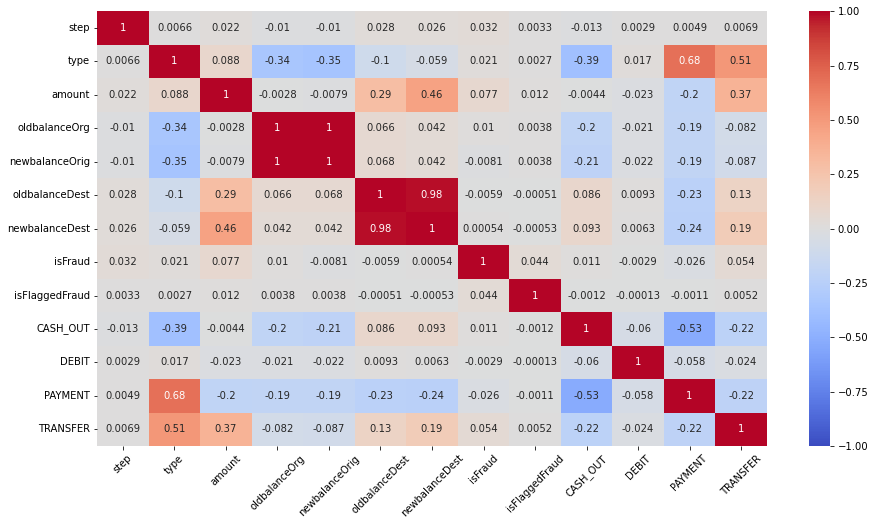

In [21]:
corrdf = df_vis.corr()
top_corr_features = corrdf.index
plt.figure(figsize=(15,8))
df_heatmap = sns.heatmap(df_vis[top_corr_features].corr(),annot=True,cmap="coolwarm", vmin=-1)
df_heatmap.set_xticklabels(df_heatmap.get_xticklabels(),rotation=45)

Through the heatmap we can see our features which are positively and negatively correlated.

# Apply Machine Learning Algorithms

## Train, Test and Split Data

In [22]:
# Imports
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn import metrics

In [23]:
y = df_cleaned['isFraud']
X = df_cleaned.drop(['isFraud','type'],axis = 1)

X_cols = X.columns

print('X shape :', X.shape)
print('y shape :', y.shape)

X shape : (6362620, 7)
y shape : (6362620,)


In [24]:
# Splitting the data using an 80/20 train/test split and assigning to appropriate variables
X_train,X_test, y_train, y_test = train_test_split(X,y, random_state= 1,test_size=0.2)

## Logistic Regression Model

In [25]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)

LogisticRegression()

Accuracy Score: 0.9982043560671547


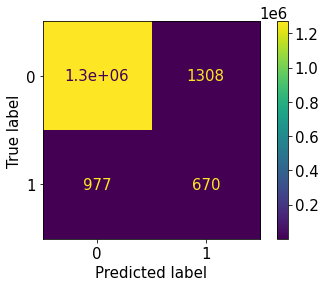

In [26]:
print (f'Accuracy Score: {accuracy_score(y_test,y_pred)}')

font = {'size'   : 15}
plt.rc('font', **font) 

cm = confusion_matrix(y_test, y_pred) 

cm_display = ConfusionMatrixDisplay(cm).plot()

Text(0.5, 1.0, 'ROC')

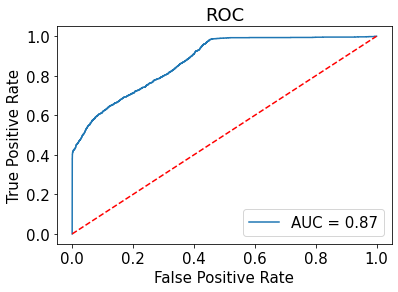

AUC score:  0.8745892976976554


In [27]:
y_score = lr.predict_proba(X_test)[:,1]

fpr, tpr, _ = roc_curve(y_test, y_score, pos_label= 1)
roc_auc = metrics.auc(fpr, tpr)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr,roc_auc=roc_auc).plot()


plt.plot([0,1],[0,1],'r--')
plt.title('ROC')
plt.show()


print('AUC score: ',roc_auc) 

## Decision Tree Model

In [28]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

y_pred = dt.predict(X_test)

DecisionTreeClassifier()

Accuracy Score: 0.9996015792236531


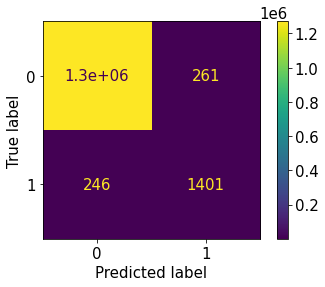

In [29]:
print (f'Accuracy Score: {accuracy_score(y_test,y_pred)}')

font = {'size'   : 15}
plt.rc('font', **font) 

cm = confusion_matrix(y_test, y_pred) 

cm_display = ConfusionMatrixDisplay(cm).plot()

Text(0.5, 1.0, 'ROC')

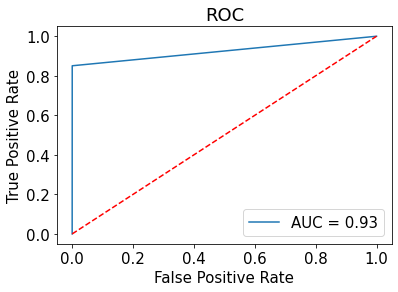

AUC score:  0.9252160763880688


In [30]:
y_score = dt.predict_proba(X_test)[:,1]

fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=1)
roc_auc = metrics.auc(fpr, tpr)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr,roc_auc=roc_auc).plot()

plt.plot([0,1],[0,1],'r--')
plt.title('ROC')
plt.show()


print('AUC score: ',roc_auc_score(y_test,dt.predict_proba(X_test)[:,1])) 

# Model Evaluation

Before we start to compare models, it is known that 8213 transactions have been tagged as fraudulent in the dataset, which is approximately 0.13% of the total number of transactions. In other words, even if our algorithm never predicted a payment to be fraudulent, it would still be almost 99.9% accurate.

After having comparing both models, it is seen through both the Confusion Matrix, ROC Curve and Area Under Curve (AUC), the **Decision Tree model** is more accurate and outperforms the Logistic Regression model. 

## Improving the Model

Due to the very low rates of data fraud in the dataset, there is a need to use another metric for comparison. 

Recall will be used because it is conceivably more important to accurately identify instances of fraud than to raise a "false alarm."

In [31]:
# Importing the recall calculation library
from sklearn.metrics import recall_score

# Making predictions for our test data using our trained models
lr_y_pred = lr.predict(X_test)
dt_y_pred = dt.predict(X_test)

# Printing our results
print('Logistic Regression Recall:', recall_score(y_test, lr_y_pred))
print('Decision Tree Recall:', recall_score(y_test, dt_y_pred))

Logistic Regression Recall: 0.4068002428658166
Decision Tree Recall: 0.8506375227686703


Decision Tree model outperforms Logistic Regression model by a wide margin. A cross-validation of the two models will declare which is the best performer with most certainty.

In [32]:
# Importing the library to perform cross-validation
from sklearn.model_selection import cross_validate

# Running the cross-validation on both Decision Tree and Logistic Regression models; specifying recall as the scoring metric
dt_scores = cross_validate(dt, X_test, y_test, scoring='recall_macro')
lr_scores = cross_validate(lr, X_test, y_test, scoring='recall_macro')

# Printing the means of the cross-validations for both models
print('Logistic Regression Recall Cross-Validation:', np.mean(lr_scores['test_score']))
print('Decision Tree Recall Cross-Validation:', np.mean(dt_scores['test_score']))

Logistic Regression Recall Cross-Validation: 0.7220420076133081
Decision Tree Recall Cross-Validation: 0.8772302534280921


# Summary

### From the EDA:
- Online payment frauds have occurred through CASH_OUT and TRANSFER payment types
- Moreover, CASH_OUT was the most common type of payment used and TRANSFER had the highest amount of movement of money.
- Out of 6362620 online transactions, only 0.13% or 8213 transactions are found to be fraudulent. This is a problem when using the models' accuracies as a metric for comparison.

### From ML Algorithm findings:
- Applied Logistic Regression and Decision Tree to address the issue.
- Decision Tree performed better than Logistic Regression, even after cross validation of both models.

# Datasets
https://www.kaggle.com/datasets/rupakroy/online-payments-fraud-detection-dataset